In [1]:
import os, warnings
import numpy as np
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [3]:
import mglearn

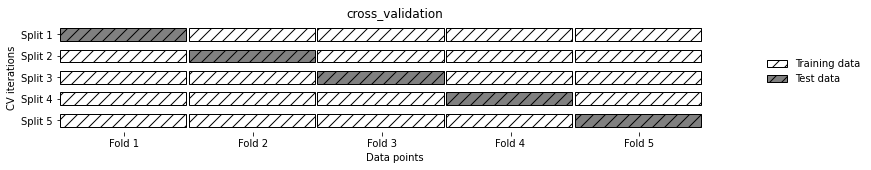

In [4]:
mglearn.plots.plot_cross_validation()

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [7]:
iris = load_iris() 
logreg = LogisticRegression()   # 모델 선택

In [8]:
import sklearn
print(sklearn.__version__)

0.23.1


In [9]:
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수 : {}".format(scores))

교차 검증 점수 : [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris 레이블 :\n{}".format(iris.target))

iris 레이블 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print(scores)

In [12]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print("교차 검증 점수 : \n{}".format(scores))

교차 검증 점수 : 
[0. 0. 0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)

print("교차 검증 점수 : \n{}".format(scores))

교차 검증 점수 : 
[0.98 0.96 0.96]


In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("교차 검증 분할 횟수 : ", len(scores))
print("평균 정확도 : {:.2f}".format(scores.mean()))

교차 검증 분할 횟수 :  150
평균 정확도 : 0.97


### 모델 평가

* GridSearch
  * 하이퍼 파라미터는 사용자가 조정할 수 있는 매개변수.

In [15]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.svm import SVC

In [17]:
iris = load_iris()

In [18]:
## 데이터 셋 나누기
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0 )

In [19]:
### SVM 매개변수 gamma, 규제 매개변수 C

In [21]:
best_score = 0

gamma_par = [0.001, 0.01, 0.1, 1, 10, 100]
C_par = [0.001, 0.01, 0.1, 1, 10, 100]

for par_g in gamma_par:
    for par_c in C_par:
        svm = SVC(gamma=par_g, C=par_c)
        svm.fit(X_train, y_train)

        # 테스트 세트로 SVC 평가
        score = svm.score(X_test, y_test)

        if score > best_score:
            best_score = score
            best_parameters = {'C':par_c, 'gamma':par_g}
            print("gamma : {}, C :{}  score : {}".format(par_g, par_c, score))        

gamma : 0.001, C :0.001  score : 0.23684210526315788
gamma : 0.001, C :1  score : 0.5789473684210527
gamma : 0.001, C :10  score : 0.9210526315789473
gamma : 0.001, C :100  score : 0.9736842105263158


In [22]:
from sklearn.svm import SVC

# 학습(훈련 + 검증), 테스트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, 
                                                      y_trainval,
                                                      random_state=0)

In [24]:
print("훈련세트 :{}, 검증세트:{}, 테스트 세트:{}".format(X_train.shape, X_valid.shape, X_test.shape))

훈련세트 :(84, 4), 검증세트:(28, 4), 테스트 세트:(38, 4)


In [27]:
best_score = 0

gamma_par = [0.001, 0.01, 0.1, 1, 10, 100]
C_par = [0.001, 0.01, 0.1, 1, 10, 100]

for par_g in gamma_par:
    for par_c in C_par:
        svm = SVC(gamma=par_g, C=par_c)
        svm.fit(X_train, y_train)

        # 검증 세트로 SVC 평가 *****
        score = svm.score(X_valid, y_valid)

        if score > best_score:
            best_score = score
            best_parameters = {'C':par_c, 'gamma':par_g}
            print("gamma : {}, C :{}  score : {}".format(par_g, par_c, score)) 

gamma : 0.001, C :0.001  score : 0.42857142857142855
gamma : 0.001, C :1  score : 0.75
gamma : 0.001, C :10  score : 0.9642857142857143
gamma : 0.001, C :100  score : 1.0


In [28]:
### 최종 평가.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("최적의 매개변수 : {} ".format(best_parameters))
print("최적의 매개변수(테스트) 평가 점수 : {:.2f}".format(test_score))

최적의 매개변수 : {'C': 100, 'gamma': 0.001} 
최적의 매개변수(테스트) 평가 점수 : 0.97


In [29]:
best_score = 0

gamma_par = [0.001, 0.01, 0.1, 1, 10, 100]
C_par = [0.001, 0.01, 0.1, 1, 10, 100]

for par_g in gamma_par:
    for par_c in C_par:
        svm = SVC(gamma=par_g, C=par_c)
        svm.fit(X_train, y_train)

        # 검증 세트로 SVC 평가 *****
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)

        if score > best_score:
            best_score = score
            best_parameters = {'C':par_c, 'gamma':par_g}
            print("gamma : {}, C :{}  score : {}".format(par_g, par_c, score)) 

gamma : 0.001, C :0.001  score : 0.366403162055336
gamma : 0.001, C :1  score : 0.6964426877470355
gamma : 0.001, C :10  score : 0.9379446640316207
gamma : 0.001, C :100  score : 0.9640316205533598
gamma : 0.01, C :100  score : 0.9644268774703558
gamma : 0.1, C :10  score : 0.9731225296442687


In [30]:
### 최종 평가.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("최적의 매개변수 : {} ".format(best_parameters))
print("최적의 매개변수(테스트) 평가 점수 : {:.2f}".format(test_score))

최적의 매개변수 : {'C': 10, 'gamma': 0.1} 
최적의 매개변수(테스트) 평가 점수 : 0.97


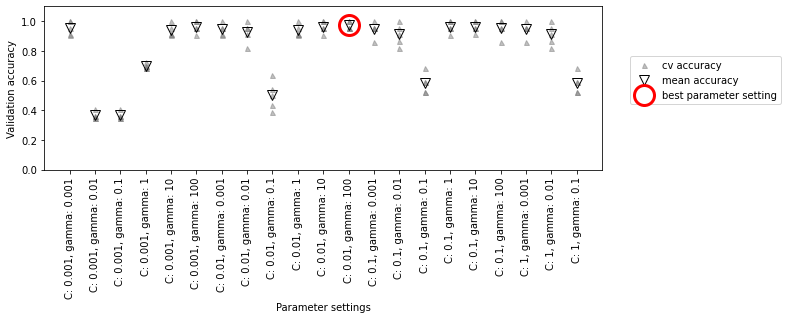

In [31]:
mglearn.plots.plot_cross_val_selection()

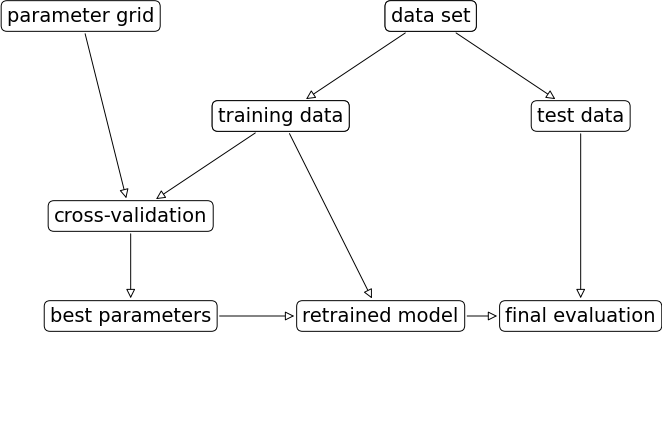

In [32]:
mglearn.plots.plot_grid_search_overview()

In [33]:
# 매개변수 
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100] }
print("매개변수 그리드 :\n", param_grid)

매개변수 그리드 :
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


### GridSearchCV를 사용한 최적의 매개변수 찾기

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
print(grid_search)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)


In [35]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)

In [36]:
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

0.9736842105263158

In [39]:
print("최적 매개변수 :", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}".format(grid_search.best_score_))

### 최고 성능 모델 확인
print("최고 성능 모델 :\n", grid_search.best_estimator_)

최적 매개변수 : {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 : 0.97
최고 성능 모델 :
 SVC(C=10, gamma=0.1)


### 우리가 GridSearchCV를 이용하여 확인한 매개변수 결과값을 전체를 확인해 보자.

In [42]:
import pandas as pd

In [46]:
pd.set_option('display.max_columns', None)  # 화면에 출력하는 컬럼 수의 제한을 없앤다. 

In [47]:
results = pd.DataFrame(grid_search.cv_results_)
results.shape

(36, 22)

In [48]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001992,0.000890,0.000998,6.330160e-04,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.001187,0.000404,0.000399,4.892203e-04,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.001795,0.000399,0.000996,8.914317e-04,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.001793,0.000745,0.000996,1.370440e-06,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.001596,0.000489,0.000397,4.866514e-04,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.002594,0.000799,0.000904,1.813771e-04,0.001,100,"{'C': 0.001, 'gamma': 100}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.001395,0.000489,0.001196,3.990191e-04,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.001594,0.000798,0.000999,6.309095e-04,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.001993,0.000630,0.001195,7.458190e-04,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.001995,0.000631,0.001794,7.455161e-04,0.01,1,"{'C': 0.01, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


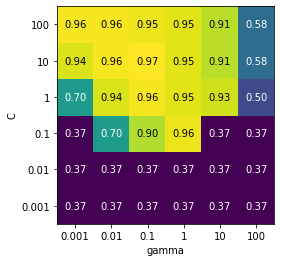

In [49]:
scores = np.array(results.mean_test_score).reshape(6,6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, 
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap='viridis')

In [50]:
import matplotlib.pyplot as plt

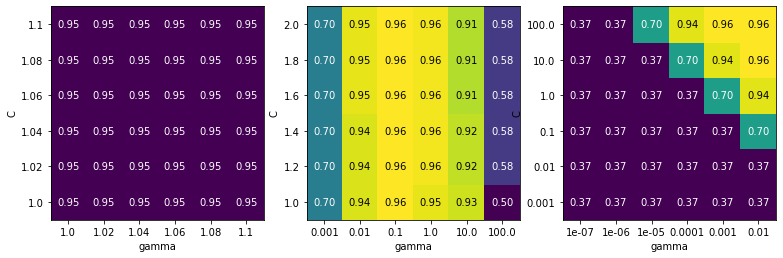

In [52]:
fig, axes = plt.subplots(1,3, figsize=(13,5))

param_grid_linear = {'C':np.linspace(1.0,1.1,6),
                     'gamma': np.linspace(1.0,1.1,6) }

param_grid_one_log = {'C':np.linspace(1,2,6), 
                     'gamma': np.logspace(-3,2,6) }

param_grid_range = {'C': np.logspace(-3,2,6),
                    'gamma': np.logspace(-7,-2,6) }

for param_grid, ax in zip([param_grid_linear,
                            param_grid_one_log,
                            param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    

    # 교차 검증 평균 점수 히트맵 그래프
    scores_image = mglearn.tools.heatmap(scores, 
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap='viridis', ax=ax                                       
                      )

### 평가지표

In [56]:
### cross_val_score(model, 입력, 출력, cv=5)
### kfold =KFold(n_splits=5)
### cross_val_score(model, 입력, 출력, cv=kfold)
### LOOCV : 데이터 하나를 검증 데이터 셋으로 한다.
### 임의분할 교차검증

### GridSearch : 여러가지 매개변수를 조정해 가면서 평가를 수행.
### 과대적합.
### 학습용 - 테스트용
### 학습(1-모델 학습), 학습(2-매개변수 변경용), 테스트용.
### 최종적으로 테스트할 때, 
### 학습(1,2) 학습을 한 이후에 , 테스트를 수행.
